# Analyzing Spotify Top 50 Songs

One of my favorite hobbies is music.  Making music, learning to produce, listening to music, all of it.  One of the main things I struggle with in my creative outlet is inspiration.  I don't really have a direction of what kind of music I want to try to learn - what I do know though is generally what types of music people enjoy listening to.  I was hoping this exercise could help broaden my horizons about different genres.

When I was learning about matplotlib and seaborn, one of the first things that came to my mind was analyzing the top songs.  I had my hypothesis on what I thought the conclusions would say: 

* Most popular genre is probably pop or some variation of it
* Most popular BPM (Beats per minute) hovers around 110-120 since it's more upbeat
* Danceability (which is something I recently learned is a thing) is probably around 80-90 out of scale of 1-100.

I found a Kaggle database that housed the top 50 songs from Spotify in 2019, and here is what is showed me.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### Data Import and Reading

In [2]:
top50 = pd.read_csv('2019_top50.csv', encoding = 'ISO-8859-1', index_col=0)

In [3]:
top50.head(3)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


The main columns that I was interested in looking at on this dataset were, from my hypothesis above:

* Genre
* Beats.Per.Minute
* Danceability

I won't be focusing my attention on the other columns just for this exercise

### Data Cleaning

In [4]:
top50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 13 columns):
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(10), object(3)
memory usage: 5.5+ KB


#### I'm trying to visualize if there are any null values I need to worry about

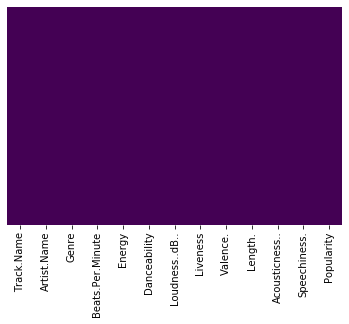

In [37]:
sns.heatmap(top50.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [38]:
top50_cleaned = top50[['Track.Name','Artist.Name','Genre','Beats.Per.Minute','Danceability', 'Energy']].copy()

In [39]:
top50_cleaned.head(3)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Danceability,Energy
1,Señorita,Shawn Mendes,canadian pop,117,76,55
2,China,Anuel AA,reggaeton flow,105,79,81
3,boyfriend (with Social House),Ariana Grande,dance pop,190,40,80


Now I only have the columns in my dataframe that I'm actually interested in analyzing.

### Visualizations

#### First up is Genre

Text(0.5, 1.0, '2019 Top 50 Songs by Genre')

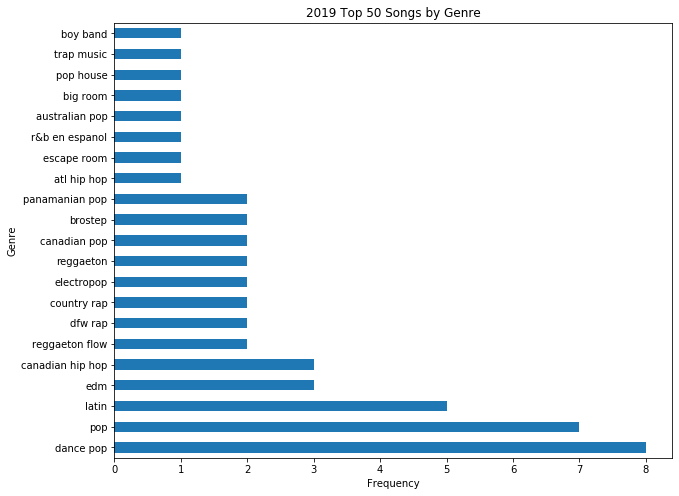

In [45]:
top50_cleaned['Genre'].value_counts().plot(kind='barh', figsize=(10,8))
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('2019 Top 50 Songs by Genre')

This shows me that the most frequent Genres in this top 50 are "Dance Pop" and "Pop" which is what I originally thought.  I mean have you listened to the radio lately?

#### Let's look at BPM next

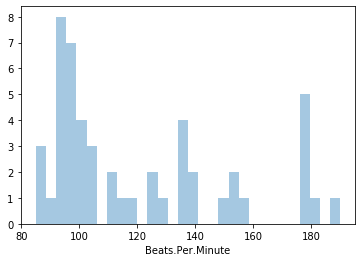

In [33]:
sns.distplot(top50_cleaned['Beats.Per.Minute'],bins=30,kde=False)

Majority of the BPMs seem to hover around 90-110 roughly, which is slightly lower than what I was expecting. 

In [10]:
top50_cleaned['Beats.Per.Minute'].mean()

120.06

This shows me that the average BPM of these top 50 songs is around 120.  This, along with the previous range, fits in line with my hypothesis.

#### Lastly, let's look at Danceability

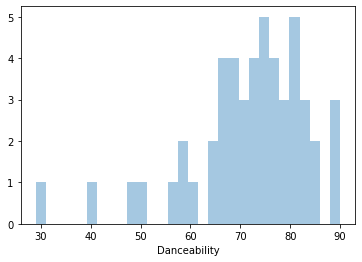

In [47]:
sns.distplot(top50_cleaned['Danceability'], kde = False, bins = 30)

In [12]:
top50_cleaned['Danceability'].mean()

71.38

This is a bit lower than what I originally thought.  My original hypothesis was 80-90 for this category.  Nonetheless, 71/100 is still relatively high on a scale which tells me people like songs that you can dance to.

#### As an extra idea, I wanted to see if there was a correlation between BPM and Danceability.  I was assuming that higher BPMs were correlated with higer Danceability scores.  Would you dance to a slow ballad (besides High School Homecoming, let's be honest)?

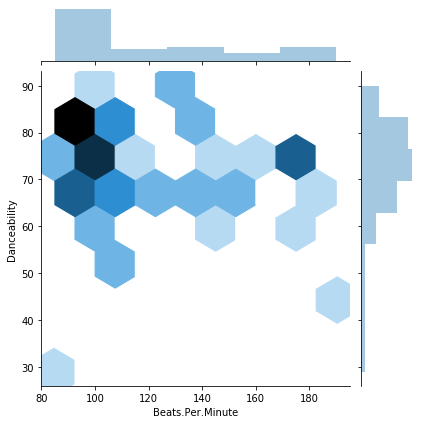

In [13]:
sns.jointplot(x='Beats.Per.Minute',y='Danceability',data=top50_cleaned,kind='hex')

These results actually threw me off.  This graph leads me to believe that a higher BPM doesn't necessarily mean higher Danceability.  